같이 하나씩 하자

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns


# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
# 데이타 로딩 - 기존 데이타셋과 다르기에 확인 필요
raw_data = pd.read_csv('./data/titanic.csv')
raw_data.info()

raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# 컬럼명 확인
# colnames = raw_data.columns 
# colnames

# 컬럼명을 모두 소문자로 변경
raw_data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
raw_data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###  생존자와 사망자의 시각화

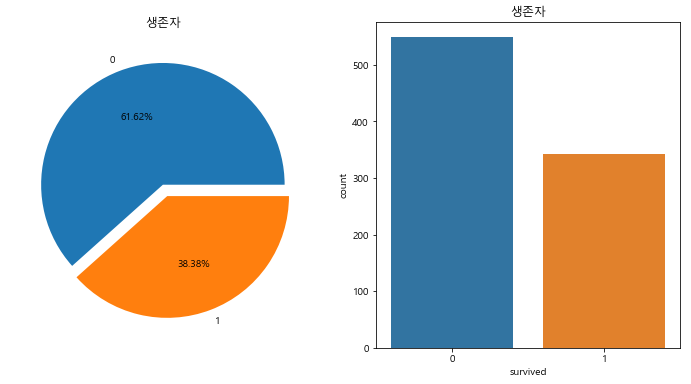

In [4]:

f, ax = plt.subplots(1,2, figsize=(12,6)) # 1행 2열 칸을 만들고

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])  # ax[0] 2개중에 첫번째
ax[0].set_title('생존자')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])  # ax[1] 2개중에 두번째
ax[1].set_title('생존자')

plt.show()

# [결과] 800정도의 사망자, 500명 정도 생존자

# 연령분포 시각화

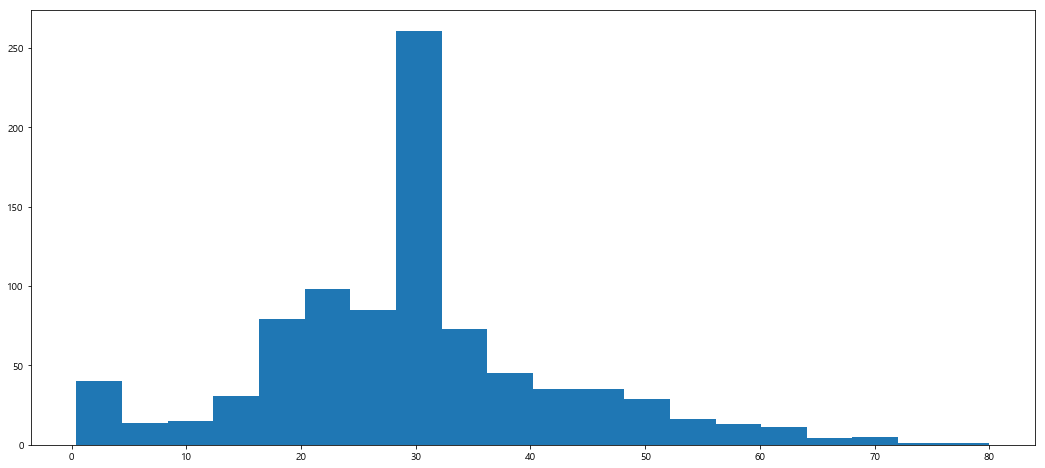

In [5]:
# 연령분포로 히스토그램 확인
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False)

# [결과] 갓난아이들도 많고 20대가 제일 많이 있었음

# 객실등급별로 각 평균 통계 - 표

In [6]:
# 객실등급별로 각 평균 통계
raw_data.groupby('pclass').mean()

# [결과] 1등실 생존률 60%, 2등실 42%, 3등실 25%
#         3등실 평균나이가 20대 중반이다

,passengerid,survived,age,sibsp,parch,fare
pclass,,,,,,
1,461.597222,0.629630,37.089907,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.884946,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.486599,0.615071,0.393075,13.675550


# 상관관계 분석

- seaborn 패키지 heatmap()

- matplotlib 패키지 scatter()

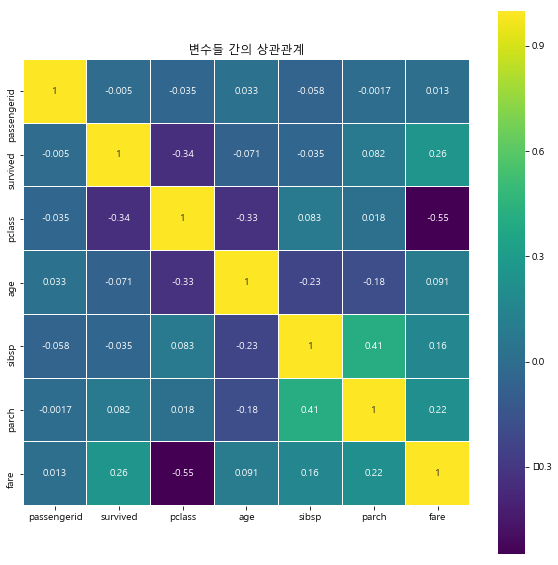

In [7]:
# 상관관계 분석

plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
                # cmap=plt.cm.viridis 
plt.title('변수들 간의 상관관계')
plt.show()



# 성별, 연령대, 객실등급별 생존자 시각화

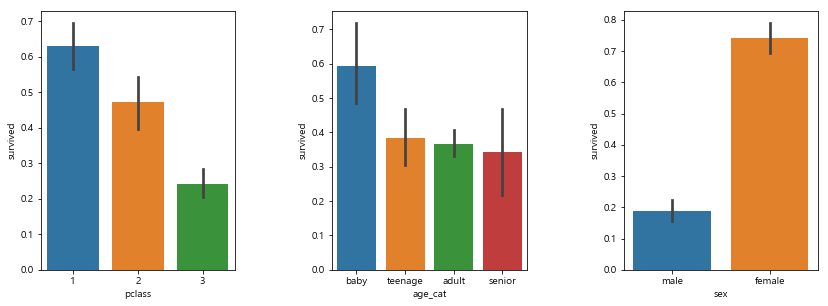

In [8]:
# 연령대를 나눠서 분석
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0,10,20,50,100], include_lowest=True, 
                             labels=['baby','teenage', 'adult','senior'])

plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass','survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat','survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex','survived', data=raw_data)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5,wspace=0.5 )
plt.show()

# [결과] 1등급 생존자가 60%로 많다
#        아이 생존자가 60% 가까이 많다
#        여성이 남성보다 많이 생존하였다